In [7]:
# -*- coding: utf-8 -*-
"""
"""
#importing Keras, Library for deep learning 
import keras
#import pydot 

import IPython
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K

from sklearn.preprocessing import StandardScaler
import glob


Using TensorFlow backend.


In [8]:


import os
print(os.listdir("data_hamad/"))


['.DS_Store', 'data_hamad_Scaled.csv', 'Lattice optimisation-Data_training.csv', 'Lattice_optimisation_DLYusra.h5', 'unseendata_hamad_Scaled.csv', 'unseendata_hamad_Scaled_2.csv']


In [9]:
#DEFINING THE FUNCTIONS

#FUNCTION 1:
def prepare_data(n_train):

    import pandas as pd
    import numpy as np

    train=pd.read_csv('data_hamad/Lattice optimisation-Data_training.csv')
    train.head()

    X=train.drop(['Target','Target.1', 'Target.2'] , axis=1)
    Y=train.drop(['Feature','Feature.1', 'Feature.2'] , axis=1)


    scaler = MinMaxScaler()

    scaler.fit(X)
    scaler.fit(Y)
    
    X = scaler.transform(X)
    Y = scaler.transform(Y)

    xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=n_train)

    return xtrain, xtest, ytrain, ytest


In [10]:
def swish(x):
    return (K.sigmoid(x) * x)
    get_custom_objects().update({'swish': Activation(swish)})

In [11]:

#FUNCTION 2:
def get_base_model(trainX, trainy):
    
    #Building the NN structure
    model = Sequential()
    def swish(x):
        return (K.sigmoid(x) * x)
        get_custom_objects().update({'swish': Activation(swish)})
        #get_custom_objects().update({'swish': Activation(swish)})
    model.add(Dense(units = 50, input_dim = 3, init = 'normal', activation=swish))
   # model.add(Dense(units = 10, init = 'uniform',activation='tanh'))
    model.add(Dense(3, activation='sigmoid')) #output layer
    
    # Compile model
    model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics=['mse','mae'])
    
    # Fit the model
    history =  model.fit(trainX, trainy, batch_size = 32, epochs = 3000,  validation_split= 0, verbose=1)
    return model



In [12]:
#FUNCTION 3:
def evaluate_model(model, trainX, testX, trainy, testy):
    testscore = model.evaluate(testX, testy, batch_size=1)
    trainscore = model.evaluate(trainX, trainy, batch_size=1)
    return testscore, trainscore
	

# add one new layer and re-train only the new layer
def add_layer(model, trainX, trainy):
	# remember the current output layer
	output_layer = model.layers[-1]
	# remove the output layer (model.summary() to check)
	model.pop()
	# mark all remaining layers as non-trainable
    
    
	#for layer in model.layers:
     #   layer.trainable = False 
        
	# add a new hidden layer
	model.add(Dense(50,input_dim = (None,50), activation='relu'))
	# re-add the output layer
	model.add(output_layer)
	# fit model
	model.fit(trainX, trainy, epochs=1000, verbose=0)
    
    


In [13]:

#Calling the functions
trainscores = dict()
testscores = dict()

trainX, testX, trainy, testy = prepare_data(3)
#model= get_base_model(trainX, trainy)
#evaluate_model(model, trainX, testX, trainy, testy)

model= get_base_model(trainX, trainX)
evaluate_model(model, trainX, testX, trainX, testX)

    
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, input_dim=3, activation=<function ..., kernel_initializer="normal")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/3000
12/12 [==============================] - 0s 13ms/step - loss: 0.2325 - mean_squared_error: 0.2325 - mean_absolute_error: 0.4527
Epoch 2/3000
12/12 [==============================] - 0s 149us/step - loss: 0.2291 - mean_squared_error: 0.2291 - mean_absolute_error: 0.4493
Epoch 3/3000
12/12 [==============================] - 0s 122us/step - loss: 0.2266 - mean_squared_error: 0.2266 - mean_absolute_error: 0.4468
Epoch 4/3000
12/12 [==============================] - 0s 160us/step - loss: 0.2244 - mean_squared_error: 0.2244 - mean_absolute_error: 0.4447
Epoch 5/3000
12/12 [==============================] - 0s 201us/step - loss: 0.2225 - mean_squared_error: 0.2225 - mean_absolute_error: 0.4427
Epoch 6/3000
12/12 [==============================] - 0s 147us/step - loss: 0.2207 - mean_squared_error: 0.2207 - mean_absolute_error: 0.4408
Epoch 7/3000
12/12 [==============================] - 0s 141us/step - loss: 0.2190 - mean_squared_error: 0.2190 - mean_absolute_error: 0.4391
Epoch 8

Epoch 59/3000
12/12 [==============================] - 0s 244us/step - loss: 0.1381 - mean_squared_error: 0.1381 - mean_absolute_error: 0.3432
Epoch 60/3000
12/12 [==============================] - 0s 254us/step - loss: 0.1366 - mean_squared_error: 0.1366 - mean_absolute_error: 0.3411
Epoch 61/3000
12/12 [==============================] - 0s 115us/step - loss: 0.1350 - mean_squared_error: 0.1350 - mean_absolute_error: 0.3391
Epoch 62/3000
12/12 [==============================] - 0s 490us/step - loss: 0.1335 - mean_squared_error: 0.1335 - mean_absolute_error: 0.3370
Epoch 63/3000
12/12 [==============================] - 0s 248us/step - loss: 0.1320 - mean_squared_error: 0.1320 - mean_absolute_error: 0.3350
Epoch 64/3000
12/12 [==============================] - 0s 147us/step - loss: 0.1305 - mean_squared_error: 0.1305 - mean_absolute_error: 0.3329
Epoch 65/3000
12/12 [==============================] - 0s 357us/step - loss: 0.1289 - mean_squared_error: 0.1289 - mean_absolute_error: 0.3308

Epoch 117/3000
12/12 [==============================] - 0s 415us/step - loss: 0.0630 - mean_squared_error: 0.0630 - mean_absolute_error: 0.2280
Epoch 118/3000
12/12 [==============================] - 0s 215us/step - loss: 0.0621 - mean_squared_error: 0.0621 - mean_absolute_error: 0.2263
Epoch 119/3000
12/12 [==============================] - 0s 229us/step - loss: 0.0611 - mean_squared_error: 0.0611 - mean_absolute_error: 0.2246
Epoch 120/3000
12/12 [==============================] - 0s 341us/step - loss: 0.0602 - mean_squared_error: 0.0602 - mean_absolute_error: 0.2229
Epoch 121/3000
12/12 [==============================] - 0s 239us/step - loss: 0.0593 - mean_squared_error: 0.0593 - mean_absolute_error: 0.2212
Epoch 122/3000
12/12 [==============================] - 0s 311us/step - loss: 0.0584 - mean_squared_error: 0.0584 - mean_absolute_error: 0.2196
Epoch 123/3000
12/12 [==============================] - 0s 187us/step - loss: 0.0575 - mean_squared_error: 0.0575 - mean_absolute_error:

Epoch 174/3000
12/12 [==============================] - 0s 284us/step - loss: 0.0269 - mean_squared_error: 0.0269 - mean_absolute_error: 0.1485
Epoch 175/3000
12/12 [==============================] - 0s 112us/step - loss: 0.0266 - mean_squared_error: 0.0266 - mean_absolute_error: 0.1475
Epoch 176/3000
12/12 [==============================] - 0s 203us/step - loss: 0.0262 - mean_squared_error: 0.0262 - mean_absolute_error: 0.1464
Epoch 177/3000
12/12 [==============================] - 0s 194us/step - loss: 0.0258 - mean_squared_error: 0.0258 - mean_absolute_error: 0.1454
Epoch 178/3000
12/12 [==============================] - 0s 271us/step - loss: 0.0254 - mean_squared_error: 0.0254 - mean_absolute_error: 0.1444
Epoch 179/3000
12/12 [==============================] - 0s 104us/step - loss: 0.0251 - mean_squared_error: 0.0251 - mean_absolute_error: 0.1434
Epoch 180/3000
12/12 [==============================] - 0s 122us/step - loss: 0.0247 - mean_squared_error: 0.0247 - mean_absolute_error:

Epoch 231/3000
12/12 [==============================] - 0s 257us/step - loss: 0.0133 - mean_squared_error: 0.0133 - mean_absolute_error: 0.1034
Epoch 232/3000
12/12 [==============================] - 0s 496us/step - loss: 0.0132 - mean_squared_error: 0.0132 - mean_absolute_error: 0.1028
Epoch 233/3000
12/12 [==============================] - 0s 207us/step - loss: 0.0130 - mean_squared_error: 0.0130 - mean_absolute_error: 0.1023
Epoch 234/3000
12/12 [==============================] - 0s 191us/step - loss: 0.0129 - mean_squared_error: 0.0129 - mean_absolute_error: 0.1017
Epoch 235/3000
12/12 [==============================] - 0s 336us/step - loss: 0.0128 - mean_squared_error: 0.0128 - mean_absolute_error: 0.1012
Epoch 236/3000
12/12 [==============================] - 0s 259us/step - loss: 0.0127 - mean_squared_error: 0.0127 - mean_absolute_error: 0.1007
Epoch 237/3000
12/12 [==============================] - 0s 147us/step - loss: 0.0126 - mean_squared_error: 0.0126 - mean_absolute_error:

Epoch 288/3000
12/12 [==============================] - 0s 353us/step - loss: 0.0088 - mean_squared_error: 0.0088 - mean_absolute_error: 0.0807
Epoch 289/3000
12/12 [==============================] - 0s 288us/step - loss: 0.0087 - mean_squared_error: 0.0087 - mean_absolute_error: 0.0804
Epoch 290/3000
12/12 [==============================] - 0s 176us/step - loss: 0.0087 - mean_squared_error: 0.0087 - mean_absolute_error: 0.0801
Epoch 291/3000
12/12 [==============================] - 0s 160us/step - loss: 0.0086 - mean_squared_error: 0.0086 - mean_absolute_error: 0.0799
Epoch 292/3000
12/12 [==============================] - 0s 278us/step - loss: 0.0086 - mean_squared_error: 0.0086 - mean_absolute_error: 0.0796
Epoch 293/3000
12/12 [==============================] - 0s 200us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0794
Epoch 294/3000
12/12 [==============================] - 0s 193us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error:

Epoch 345/3000
12/12 [==============================] - 0s 236us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0699
Epoch 346/3000
12/12 [==============================] - 0s 173us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0697
Epoch 347/3000
12/12 [==============================] - 0s 512us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0697
Epoch 348/3000
12/12 [==============================] - 0s 170us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0695
Epoch 349/3000
12/12 [==============================] - 0s 155us/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0694
Epoch 350/3000
12/12 [==============================] - 0s 439us/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0692
Epoch 351/3000
12/12 [==============================] - 0s 353us/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error:

Epoch 402/3000
12/12 [==============================] - 0s 473us/step - loss: 0.0061 - mean_squared_error: 0.0061 - mean_absolute_error: 0.0641
Epoch 403/3000
12/12 [==============================] - 0s 198us/step - loss: 0.0061 - mean_squared_error: 0.0061 - mean_absolute_error: 0.0641
Epoch 404/3000
12/12 [==============================] - 0s 127us/step - loss: 0.0061 - mean_squared_error: 0.0061 - mean_absolute_error: 0.0639
Epoch 405/3000
12/12 [==============================] - 0s 474us/step - loss: 0.0060 - mean_squared_error: 0.0060 - mean_absolute_error: 0.0639
Epoch 406/3000
12/12 [==============================] - 0s 276us/step - loss: 0.0060 - mean_squared_error: 0.0060 - mean_absolute_error: 0.0637
Epoch 407/3000
12/12 [==============================] - 0s 178us/step - loss: 0.0060 - mean_squared_error: 0.0060 - mean_absolute_error: 0.0638
Epoch 408/3000
12/12 [==============================] - 0s 180us/step - loss: 0.0060 - mean_squared_error: 0.0060 - mean_absolute_error:

Epoch 459/3000
12/12 [==============================] - 0s 145us/step - loss: 0.0054 - mean_squared_error: 0.0054 - mean_absolute_error: 0.0598
Epoch 460/3000
12/12 [==============================] - 0s 172us/step - loss: 0.0054 - mean_squared_error: 0.0054 - mean_absolute_error: 0.0595
Epoch 461/3000
12/12 [==============================] - 0s 231us/step - loss: 0.0054 - mean_squared_error: 0.0054 - mean_absolute_error: 0.0596
Epoch 462/3000
12/12 [==============================] - 0s 146us/step - loss: 0.0053 - mean_squared_error: 0.0053 - mean_absolute_error: 0.0593
Epoch 463/3000
12/12 [==============================] - 0s 428us/step - loss: 0.0053 - mean_squared_error: 0.0053 - mean_absolute_error: 0.0595
Epoch 464/3000
12/12 [==============================] - 0s 161us/step - loss: 0.0053 - mean_squared_error: 0.0053 - mean_absolute_error: 0.0592
Epoch 465/3000
12/12 [==============================] - 0s 205us/step - loss: 0.0053 - mean_squared_error: 0.0053 - mean_absolute_error:

Epoch 516/3000
12/12 [==============================] - 0s 600us/step - loss: 0.0048 - mean_squared_error: 0.0048 - mean_absolute_error: 0.0551
Epoch 517/3000
12/12 [==============================] - 0s 794us/step - loss: 0.0048 - mean_squared_error: 0.0048 - mean_absolute_error: 0.0553
Epoch 518/3000
12/12 [==============================] - 0s 133us/step - loss: 0.0048 - mean_squared_error: 0.0048 - mean_absolute_error: 0.0550
Epoch 519/3000
12/12 [==============================] - 0s 444us/step - loss: 0.0047 - mean_squared_error: 0.0047 - mean_absolute_error: 0.0552
Epoch 520/3000
12/12 [==============================] - 0s 353us/step - loss: 0.0047 - mean_squared_error: 0.0047 - mean_absolute_error: 0.0548
Epoch 521/3000
12/12 [==============================] - 0s 196us/step - loss: 0.0047 - mean_squared_error: 0.0047 - mean_absolute_error: 0.0550
Epoch 522/3000
12/12 [==============================] - 0s 359us/step - loss: 0.0047 - mean_squared_error: 0.0047 - mean_absolute_error:

Epoch 573/3000
12/12 [==============================] - 0s 327us/step - loss: 0.0043 - mean_squared_error: 0.0043 - mean_absolute_error: 0.0509
Epoch 574/3000
12/12 [==============================] - 0s 312us/step - loss: 0.0043 - mean_squared_error: 0.0043 - mean_absolute_error: 0.0505
Epoch 575/3000
12/12 [==============================] - 0s 152us/step - loss: 0.0043 - mean_squared_error: 0.0043 - mean_absolute_error: 0.0507
Epoch 576/3000
12/12 [==============================] - 0s 431us/step - loss: 0.0043 - mean_squared_error: 0.0043 - mean_absolute_error: 0.0503
Epoch 577/3000
12/12 [==============================] - 0s 295us/step - loss: 0.0043 - mean_squared_error: 0.0043 - mean_absolute_error: 0.0505
Epoch 578/3000
12/12 [==============================] - 0s 476us/step - loss: 0.0043 - mean_squared_error: 0.0043 - mean_absolute_error: 0.0502
Epoch 579/3000
12/12 [==============================] - 0s 284us/step - loss: 0.0043 - mean_squared_error: 0.0043 - mean_absolute_error:

Epoch 630/3000
12/12 [==============================] - 0s 166us/step - loss: 0.0041 - mean_squared_error: 0.0041 - mean_absolute_error: 0.0463
Epoch 631/3000
12/12 [==============================] - 0s 243us/step - loss: 0.0041 - mean_squared_error: 0.0041 - mean_absolute_error: 0.0465
Epoch 632/3000
12/12 [==============================] - 0s 188us/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0461
Epoch 633/3000
12/12 [==============================] - 0s 532us/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0463
Epoch 634/3000
12/12 [==============================] - 0s 410us/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0460
Epoch 635/3000
12/12 [==============================] - 0s 312us/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0462
Epoch 636/3000
12/12 [==============================] - 0s 205us/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error:

Epoch 687/3000
12/12 [==============================] - 0s 273us/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0435
Epoch 688/3000
12/12 [==============================] - 0s 125us/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0443
Epoch 689/3000
12/12 [==============================] - 0s 193us/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0434
Epoch 690/3000
12/12 [==============================] - 0s 406us/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0443
Epoch 691/3000
12/12 [==============================] - 0s 210us/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0434
Epoch 692/3000
12/12 [==============================] - 0s 229us/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0443
Epoch 693/3000
12/12 [==============================] - 0s 192us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error:

Epoch 744/3000
12/12 [==============================] - 0s 426us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 745/3000
12/12 [==============================] - 0s 332us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0431
Epoch 746/3000
12/12 [==============================] - 0s 176us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 747/3000
12/12 [==============================] - 0s 407us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0431
Epoch 748/3000
12/12 [==============================] - 0s 138us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 749/3000
12/12 [==============================] - 0s 139us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0431
Epoch 750/3000
12/12 [==============================] - 0s 342us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error:

Epoch 801/3000
12/12 [==============================] - 0s 203us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0433
Epoch 802/3000
12/12 [==============================] - 0s 132us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 803/3000
12/12 [==============================] - 0s 177us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0433
Epoch 804/3000
12/12 [==============================] - 0s 156us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 805/3000
12/12 [==============================] - 0s 137us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0433
Epoch 806/3000
12/12 [==============================] - 0s 254us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 807/3000
12/12 [==============================] - 0s 177us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error:

Epoch 858/3000
12/12 [==============================] - 0s 227us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443
Epoch 859/3000
12/12 [==============================] - 0s 324us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 860/3000
12/12 [==============================] - 0s 136us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443
Epoch 861/3000
12/12 [==============================] - 0s 142us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 862/3000
12/12 [==============================] - 0s 309us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443
Epoch 863/3000
12/12 [==============================] - 0s 116us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 864/3000
12/12 [==============================] - 0s 188us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error:

Epoch 915/3000
12/12 [==============================] - 0s 449us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 916/3000
12/12 [==============================] - 0s 231us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443
Epoch 917/3000
12/12 [==============================] - 0s 165us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 918/3000
12/12 [==============================] - 0s 140us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443
Epoch 919/3000
12/12 [==============================] - 0s 233us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 920/3000
12/12 [==============================] - 0s 125us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443
Epoch 921/3000
12/12 [==============================] - 0s 253us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error:

Epoch 972/3000
12/12 [==============================] - 0s 189us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443
Epoch 973/3000
12/12 [==============================] - 0s 393us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 974/3000
12/12 [==============================] - 0s 397us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443
Epoch 975/3000
12/12 [==============================] - 0s 193us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 976/3000
12/12 [==============================] - 0s 246us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443
Epoch 977/3000
12/12 [==============================] - 0s 328us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 978/3000
12/12 [==============================] - 0s 351us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error:

Epoch 1029/3000
12/12 [==============================] - 0s 222us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1030/3000
12/12 [==============================] - 0s 141us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443
Epoch 1031/3000
12/12 [==============================] - 0s 462us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1032/3000
12/12 [==============================] - 0s 241us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443
Epoch 1033/3000
12/12 [==============================] - 0s 207us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1034/3000
12/12 [==============================] - 0s 273us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443
Epoch 1035/3000
12/12 [==============================] - 0s 226us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1086/3000
12/12 [==============================] - 0s 261us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443
Epoch 1087/3000
12/12 [==============================] - 0s 207us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1088/3000
12/12 [==============================] - 0s 274us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443
Epoch 1089/3000
12/12 [==============================] - 0s 245us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1090/3000
12/12 [==============================] - 0s 513us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443
Epoch 1091/3000
12/12 [==============================] - 0s 270us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1092/3000
12/12 [==============================] - 0s 106us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1143/3000
12/12 [==============================] - 0s 269us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1144/3000
12/12 [==============================] - 0s 370us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1145/3000
12/12 [==============================] - 0s 296us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1146/3000
12/12 [==============================] - 0s 162us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1147/3000
12/12 [==============================] - 0s 373us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1148/3000
12/12 [==============================] - 0s 377us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1149/3000
12/12 [==============================] - 0s 187us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1200/3000
12/12 [==============================] - 0s 202us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1201/3000
12/12 [==============================] - 0s 341us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1202/3000
12/12 [==============================] - 0s 292us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1203/3000
12/12 [==============================] - 0s 150us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1204/3000
12/12 [==============================] - 0s 230us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1205/3000
12/12 [==============================] - 0s 211us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1206/3000
12/12 [==============================] - 0s 468us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1257/3000
12/12 [==============================] - 0s 185us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1258/3000
12/12 [==============================] - 0s 110us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1259/3000
12/12 [==============================] - 0s 366us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1260/3000
12/12 [==============================] - 0s 298us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1261/3000
12/12 [==============================] - 0s 174us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1262/3000
12/12 [==============================] - 0s 310us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1263/3000
12/12 [==============================] - 0s 205us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1314/3000
12/12 [==============================] - 0s 213us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1315/3000
12/12 [==============================] - 0s 129us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1316/3000
12/12 [==============================] - 0s 208us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1317/3000
12/12 [==============================] - 0s 119us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1318/3000
12/12 [==============================] - 0s 305us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1319/3000
12/12 [==============================] - 0s 359us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0435
Epoch 1320/3000
12/12 [==============================] - 0s 282us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1371/3000
12/12 [==============================] - 0s 134us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1372/3000
12/12 [==============================] - 0s 314us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1373/3000
12/12 [==============================] - 0s 329us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1374/3000
12/12 [==============================] - 0s 413us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1375/3000
12/12 [==============================] - 0s 279us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1376/3000
12/12 [==============================] - 0s 122us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1377/3000
12/12 [==============================] - 0s 464us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1428/3000
12/12 [==============================] - 0s 315us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1429/3000
12/12 [==============================] - 0s 268us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1430/3000
12/12 [==============================] - 0s 277us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1431/3000
12/12 [==============================] - 0s 224us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1432/3000
12/12 [==============================] - 0s 185us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1433/3000
12/12 [==============================] - 0s 480us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1434/3000
12/12 [==============================] - 0s 232us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1485/3000
12/12 [==============================] - 0s 219us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1486/3000
12/12 [==============================] - 0s 390us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1487/3000
12/12 [==============================] - 0s 104us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1488/3000
12/12 [==============================] - 0s 328us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1489/3000
12/12 [==============================] - 0s 367us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1490/3000
12/12 [==============================] - 0s 115us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1491/3000
12/12 [==============================] - 0s 317us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1542/3000
12/12 [==============================] - 0s 169us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1543/3000
12/12 [==============================] - 0s 231us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1544/3000
12/12 [==============================] - 0s 357us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1545/3000
12/12 [==============================] - 0s 247us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1546/3000
12/12 [==============================] - 0s 139us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1547/3000
12/12 [==============================] - 0s 413us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1548/3000
12/12 [==============================] - 0s 351us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1599/3000
12/12 [==============================] - 0s 270us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1600/3000
12/12 [==============================] - 0s 113us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1601/3000
12/12 [==============================] - 0s 136us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1602/3000
12/12 [==============================] - 0s 309us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1603/3000
12/12 [==============================] - 0s 160us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1604/3000
12/12 [==============================] - 0s 148us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1605/3000
12/12 [==============================] - 0s 286us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1656/3000
12/12 [==============================] - 0s 238us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1657/3000
12/12 [==============================] - 0s 481us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1658/3000
12/12 [==============================] - 0s 277us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1659/3000
12/12 [==============================] - 0s 205us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1660/3000
12/12 [==============================] - 0s 223us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1661/3000
12/12 [==============================] - 0s 294us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1662/3000
12/12 [==============================] - 0s 258us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1713/3000
12/12 [==============================] - 0s 204us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1714/3000
12/12 [==============================] - 0s 202us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1715/3000
12/12 [==============================] - 0s 396us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1716/3000
12/12 [==============================] - 0s 245us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1717/3000
12/12 [==============================] - 0s 182us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1718/3000
12/12 [==============================] - 0s 447us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1719/3000
12/12 [==============================] - 0s 303us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1770/3000
12/12 [==============================] - 0s 199us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1771/3000
12/12 [==============================] - 0s 262us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1772/3000
12/12 [==============================] - 0s 428us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1773/3000
12/12 [==============================] - 0s 203us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1774/3000
12/12 [==============================] - 0s 114us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1775/3000
12/12 [==============================] - 0s 202us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1776/3000
12/12 [==============================] - 0s 285us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1827/3000
12/12 [==============================] - 0s 350us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1828/3000
12/12 [==============================] - 0s 237us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1829/3000
12/12 [==============================] - 0s 264us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1830/3000
12/12 [==============================] - 0s 194us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1831/3000
12/12 [==============================] - 0s 316us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1832/3000
12/12 [==============================] - 0s 168us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1833/3000
12/12 [==============================] - 0s 224us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1884/3000
12/12 [==============================] - 0s 226us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1885/3000
12/12 [==============================] - 0s 237us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1886/3000
12/12 [==============================] - 0s 407us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1887/3000
12/12 [==============================] - 0s 187us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1888/3000
12/12 [==============================] - 0s 201us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1889/3000
12/12 [==============================] - 0s 392us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1890/3000
12/12 [==============================] - 0s 286us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1941/3000
12/12 [==============================] - 0s 232us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1942/3000
12/12 [==============================] - 0s 216us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1943/3000
12/12 [==============================] - 0s 273us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1944/3000
12/12 [==============================] - 0s 111us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1945/3000
12/12 [==============================] - 0s 243us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 1946/3000
12/12 [==============================] - 0s 351us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1947/3000
12/12 [==============================] - 0s 236us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 1998/3000
12/12 [==============================] - 0s 195us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 1999/3000
12/12 [==============================] - 0s 236us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2000/3000
12/12 [==============================] - 0s 214us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 2001/3000
12/12 [==============================] - 0s 419us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2002/3000
12/12 [==============================] - 0s 232us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 2003/3000
12/12 [==============================] - 0s 362us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2004/3000
12/12 [==============================] - 0s 243us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2055/3000
12/12 [==============================] - 0s 224us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2056/3000
12/12 [==============================] - 0s 429us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 2057/3000
12/12 [==============================] - 0s 190us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2058/3000
12/12 [==============================] - 0s 278us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 2059/3000
12/12 [==============================] - 0s 127us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2060/3000
12/12 [==============================] - 0s 429us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 2061/3000
12/12 [==============================] - 0s 224us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2112/3000
12/12 [==============================] - 0s 136us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 2113/3000
12/12 [==============================] - 0s 246us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2114/3000
12/12 [==============================] - 0s 145us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 2115/3000
12/12 [==============================] - 0s 392us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2116/3000
12/12 [==============================] - 0s 206us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 2117/3000
12/12 [==============================] - 0s 156us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2118/3000
12/12 [==============================] - 0s 396us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2169/3000
12/12 [==============================] - 0s 477us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2170/3000
12/12 [==============================] - 0s 211us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 2171/3000
12/12 [==============================] - 0s 298us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2172/3000
12/12 [==============================] - 0s 187us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 2173/3000
12/12 [==============================] - 0s 153us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2174/3000
12/12 [==============================] - 0s 292us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0442
Epoch 2175/3000
12/12 [==============================] - 0s 160us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2226/3000
12/12 [==============================] - 0s 117us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2227/3000
12/12 [==============================] - 0s 416us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2228/3000
12/12 [==============================] - 0s 227us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2229/3000
12/12 [==============================] - 0s 172us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2230/3000
12/12 [==============================] - 0s 337us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2231/3000
12/12 [==============================] - 0s 238us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2232/3000
12/12 [==============================] - 0s 178us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2283/3000
12/12 [==============================] - 0s 269us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2284/3000
12/12 [==============================] - 0s 267us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2285/3000
12/12 [==============================] - 0s 200us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2286/3000
12/12 [==============================] - 0s 374us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2287/3000
12/12 [==============================] - 0s 217us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2288/3000
12/12 [==============================] - 0s 330us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2289/3000
12/12 [==============================] - 0s 280us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2340/3000
12/12 [==============================] - 0s 131us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2341/3000
12/12 [==============================] - 0s 236us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2342/3000
12/12 [==============================] - 0s 299us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2343/3000
12/12 [==============================] - 0s 143us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2344/3000
12/12 [==============================] - 0s 303us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2345/3000
12/12 [==============================] - 0s 251us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2346/3000
12/12 [==============================] - 0s 323us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2397/3000
12/12 [==============================] - 0s 322us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2398/3000
12/12 [==============================] - 0s 306us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2399/3000
12/12 [==============================] - 0s 236us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2400/3000
12/12 [==============================] - 0s 274us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2401/3000
12/12 [==============================] - 0s 293us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2402/3000
12/12 [==============================] - 0s 163us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2403/3000
12/12 [==============================] - 0s 246us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2454/3000
12/12 [==============================] - 0s 199us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2455/3000
12/12 [==============================] - 0s 278us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2456/3000
12/12 [==============================] - 0s 188us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2457/3000
12/12 [==============================] - 0s 296us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2458/3000
12/12 [==============================] - 0s 323us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2459/3000
12/12 [==============================] - 0s 285us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2460/3000
12/12 [==============================] - 0s 330us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2511/3000
12/12 [==============================] - 0s 234us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2512/3000
12/12 [==============================] - 0s 218us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2513/3000
12/12 [==============================] - 0s 177us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2514/3000
12/12 [==============================] - 0s 144us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2515/3000
12/12 [==============================] - 0s 259us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2516/3000
12/12 [==============================] - 0s 203us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2517/3000
12/12 [==============================] - 0s 249us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2568/3000
12/12 [==============================] - 0s 245us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2569/3000
12/12 [==============================] - 0s 246us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2570/3000
12/12 [==============================] - 0s 332us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2571/3000
12/12 [==============================] - 0s 327us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2572/3000
12/12 [==============================] - 0s 365us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2573/3000
12/12 [==============================] - 0s 279us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2574/3000
12/12 [==============================] - 0s 229us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2625/3000
12/12 [==============================] - 0s 350us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2626/3000
12/12 [==============================] - 0s 233us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2627/3000
12/12 [==============================] - 0s 224us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2628/3000
12/12 [==============================] - 0s 430us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2629/3000
12/12 [==============================] - 0s 278us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2630/3000
12/12 [==============================] - 0s 154us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2631/3000
12/12 [==============================] - 0s 598us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2682/3000
12/12 [==============================] - 0s 148us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2683/3000
12/12 [==============================] - 0s 190us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2684/3000
12/12 [==============================] - 0s 215us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2685/3000
12/12 [==============================] - 0s 524us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2686/3000
12/12 [==============================] - 0s 355us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2687/3000
12/12 [==============================] - 0s 509us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2688/3000
12/12 [==============================] - 0s 242us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2739/3000
12/12 [==============================] - 0s 223us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2740/3000
12/12 [==============================] - 0s 116us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2741/3000
12/12 [==============================] - 0s 116us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2742/3000
12/12 [==============================] - 0s 434us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2743/3000
12/12 [==============================] - 0s 179us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2744/3000
12/12 [==============================] - 0s 319us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2745/3000
12/12 [==============================] - 0s 454us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2796/3000
12/12 [==============================] - 0s 471us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2797/3000
12/12 [==============================] - 0s 309us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2798/3000
12/12 [==============================] - 0s 157us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2799/3000
12/12 [==============================] - 0s 266us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2800/3000
12/12 [==============================] - 0s 229us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2801/3000
12/12 [==============================] - 0s 683us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2802/3000
12/12 [==============================] - 0s 246us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2853/3000
12/12 [==============================] - 0s 160us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2854/3000
12/12 [==============================] - 0s 149us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2855/3000
12/12 [==============================] - 0s 335us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2856/3000
12/12 [==============================] - 0s 154us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2857/3000
12/12 [==============================] - 0s 238us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2858/3000
12/12 [==============================] - 0s 292us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2859/3000
12/12 [==============================] - 0s 250us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2910/3000
12/12 [==============================] - 0s 180us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2911/3000
12/12 [==============================] - 0s 198us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2912/3000
12/12 [==============================] - 0s 305us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2913/3000
12/12 [==============================] - 0s 139us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2914/3000
12/12 [==============================] - 0s 297us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2915/3000
12/12 [==============================] - 0s 478us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0434
Epoch 2916/3000
12/12 [==============================] - 0s 331us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

Epoch 2967/3000
12/12 [==============================] - 0s 574us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0433
Epoch 2968/3000
12/12 [==============================] - 0s 274us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2969/3000
12/12 [==============================] - 0s 148us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0433
Epoch 2970/3000
12/12 [==============================] - 0s 294us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2971/3000
12/12 [==============================] - 0s 305us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0433
Epoch 2972/3000
12/12 [==============================] - 0s 326us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0441
Epoch 2973/3000
12/12 [==============================] - 0s 266us/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute

In [1]:

# add layer
n_layers = 2
for i in range(n_layers):
    add_layer(model, trainX, trainX)
    #add_layer(model, trainX, trainy)
# evaluate model
    testscorex, trainscorex = evaluate_model(model, trainX, testX, trainX, testX)
    #testscorex, trainscorex = evaluate_model(model, trainX, testX, trainy, testy)
#    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), testscore, trainscore))
    trainscores[len(model.layers)] = (trainscorex[0], trainscorex[2])
    testscores[len(model.layers)] = (testscorex[0], testscorex[2])

NameError: name 'add_layer' is not defined

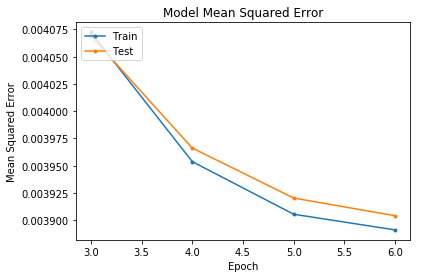

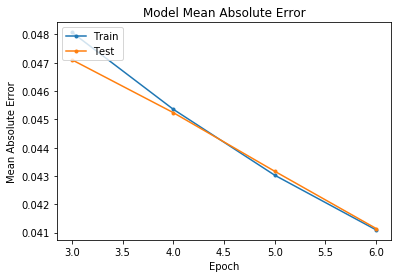

In [16]:
# plot number of added layers vs accuracy
plt.plot(trainscores.keys(), [trainscores[k][0] for k in trainscores.keys()], label='train', marker='.')
plt.plot(testscores.keys(), [testscores[k][0] for k in testscores.keys()], label='test', marker='.')
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot number of added layers vs accuracy
plt.plot(trainscores.keys(), [trainscores[k][1] for k in trainscores.keys()], label='train', marker='.')
plt.plot(testscores.keys(), [testscores[k][1] for k in testscores.keys()], label='test', marker='.')
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
print(trainy)

[[0.29745826 0.13309585 0.19427354]
 [0.52481133 0.16267271 0.35035337]
 [0.04724613 0.01198187 0.01687548]
 [0.11582476 0.03227547 0.06961643]
 [0.08848209 0.01899827 0.02929805]
 [0.95274449 0.89529361 1.        ]
 [0.2955368  1.         0.40881375]
 [0.32203118 0.14712867 0.21614387]
 [0.13516204 0.04220639 0.0996992 ]
 [0.29402335 0.12111399 0.20330016]
 [0.         0.         0.        ]
 [0.42734717 0.52946891 0.63258481]]


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 153       
Total params: 10,553
Trainable params: 10,553
Non-trainable params: 0
_________________________________________________________________


In [19]:
    import pandas as pd
    import numpy as np

    train=pd.read_csv('data_hamad/Lattice optimisation-Data_training.csv')
    train.head()

    X=train.drop(['Target','Target.1', 'Target.2'] , axis=1)
    Y=train.drop(['Feature','Feature.1', 'Feature.2'] , axis=1)


    scaler = MinMaxScaler()

    scaler.fit(X)
    scaler.fit(Y)
    
    X = scaler.transform(X)
    Y2 = scaler.transform(Y)

In [20]:
y_hamad_predition=model.predict(X)

In [21]:
print(y_hamad_predition)

[[3.69548798e-06 2.38292903e-01 1.94907188e-05]
 [1.20997429e-05 3.49752992e-01 5.34653664e-05]
 [1.23381615e-05 3.50263298e-01 5.40614128e-05]
 [1.22785568e-05 3.50255013e-01 5.40912151e-05]
 [3.69548798e-06 4.24740732e-01 1.94311142e-05]
 [3.48687172e-06 2.37837285e-01 1.88648701e-05]
 [0.00000000e+00 1.25918776e-01 3.87430191e-07]
 [3.57627869e-06 2.37829357e-01 1.88648701e-05]
 [1.20997429e-05 3.49744678e-01 5.33759594e-05]
 [3.42726707e-06 2.37366229e-01 1.82986259e-05]
 [3.57627869e-06 2.37821430e-01 1.88350677e-05]
 [3.57627869e-06 2.37829357e-01 1.88648701e-05]
 [2.98023224e-08 1.25930190e-01 4.17232513e-07]
 [3.57627869e-06 2.37829342e-01 1.88599261e-05]
 [4.15667962e-08 1.25291005e-01 4.20620353e-07]]


In [16]:
y_hamad_predition2=scaler.inverse_transform(y_hamad_predition)
print(y_hamad_predition2)

[[1.2123457e+01 2.3369253e+00 3.6686604e+03]
 [1.2123258e+01 3.3797114e+00 3.6667385e+03]
 [1.2123293e+01 3.3907363e+00 3.6669460e+03]
 [1.2123297e+01 3.3905375e+00 3.6669460e+03]
 [1.2123184e+01 4.0510268e+00 3.6659150e+03]
 [1.2123425e+01 2.3297985e+00 3.6684663e+03]
 [1.2123405e+01 1.2434354e+00 3.6696179e+03]
 [1.2123422e+01 2.3296673e+00 3.6684663e+03]
 [1.2123258e+01 3.3795133e+00 3.6667454e+03]
 [1.2123389e+01 2.3224282e+00 3.6682720e+03]
 [1.2123425e+01 2.3295360e+00 3.6684729e+03]
 [1.2123422e+01 2.3296673e+00 3.6684663e+03]
 [1.2123408e+01 1.2435560e+00 3.6696313e+03]
 [1.2123428e+01 2.3296669e+00 3.6684653e+03]
 [1.2123365e+01 1.2372686e+00 3.6693418e+03]]


In [16]:
pd.DataFrame({'real'  'real2'  'real3' : list(y_hamad_predition2)} ) .to_csv('results_hamad.csv',index=True)

In [17]:
y_hamad_predition2.shape


(15, 3)

In [18]:
y_hamad_predition2.to_csv('hamadpredictions.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [19]:
print(y_hamad_predition2)

[[6.21384773e+01 3.17313027e+00 9.55528516e+04]
 [1.85705490e+01 1.62728101e-01 9.89237109e+03]
 [3.22648315e+01 5.34490108e-01 2.77766758e+04]
 [3.23181801e+01 5.36281645e-01 2.78565020e+04]
 [1.50741005e+01 7.91151896e-02 5.86307129e+03]
 [3.49562759e+01 1.02627778e+00 3.76556445e+04]
 [3.97309036e+01 6.47234488e+00 7.23723438e+04]
 [3.50184898e+01 1.03006101e+00 3.77723320e+04]
 [1.85950336e+01 1.63264275e-01 9.91991406e+03]
 [2.11872959e+01 3.59283656e-01 1.49497764e+04]
 [3.50808296e+01 1.03385723e+00 3.78893516e+04]
 [3.50184898e+01 1.03006101e+00 3.77723320e+04]
 [3.97126884e+01 6.46987772e+00 7.23245078e+04]
 [3.50184898e+01 1.03006065e+00 3.77723320e+04]
 [2.47371349e+01 3.79446483e+00 3.17006699e+04]]


In [ ]:
Y.shape

In [ ]:
y_hamad_predition2.shape

In [20]:

model.save('Matrial_1.h5')

